# Gradient Descent
An extremely useful tool in Machine Learning is Gradient Descent. It's used to find an optimal minimum, often a loss function. Minimizing the loss function is what is used to optimize machine learning algorithms. Here, we will take a simple function of one variable, find it's derivative, and use that derivative to calculate the local minimum. I'll be using SymPy to find the derivative (gradient) and using that in my calculations.

In [139]:
import pandas as pd
import numpy as np
import sympy as sp
import statistics as stat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [142]:
x, y = sp.symbols('x y')

# First function, a single-variabled function of x
f = 2*x**4 + 6*x**3 + 5*x**2 + x + 14
f_prime = sp.diff(f)
print(f_prime)

# Second function, a multivariable function to display gradient descent with an actual gradient
g = x**2 + y**2 + 3*x + 2*y
partial_x = sp.diff(g, x)
partial_y = sp.diff(g, y)
gradient = [partial_x, partial_y]
print(gradient)

8*x**3 + 18*x**2 + 10*x + 1
[2*x + 3, 2*y + 2]


In [215]:
# The functions we will use gradient descent on to find the local minimums
def f(x):
    return 12*x**2 + 9*x + 14

def f_prime(x):
    return 24*x + 9

# I changed g and gradient_g to have a surface that had more of a dip to it
def g(x, y):
#     return x**2 + y**2 + 3*x + 2*y
    return np.sin(np.sqrt(x**2 + y**2))

def gradient_g(x, y):
#     return np.array([2*x + 3, 2*y + 2])
    return np.array([x * np.cos(np.sqrt(x**2 + y**2)) / np.sqrt(x**2 + y**2),
                    y * np.cos(np.sqrt(x**2 + y**2)) / np.sqrt(x**2 + y**2)])

def gradient_descent_2D(start, f, f_prime, alpha, num_iterations = 100, epsilon = .001, plot = True):
    """
    Function to calculate the local minimum from the given start point using 
    Gradient Descent on a function of one variable
    INPUTS:
        - start, an x to start the gradient descent process
        - f, the function we are looking to minimize
        - f_prime, the derivative of the function
        - alpha, the learning rate for the algorithm, usually between [0.1, 0.4]
        - num_iterations, an integer, the number of iterations to stop the program
                        should it not reach an optimum quickly 
        - epsilon, the error threshold at which to stop the algorithm
        - plot, if True, will plot how the algorithm moved on the given function
    OUTPUTS:
        - minimum, the final minimum calculated by the algorithm
    """
    all_x = []
    all_x.append(start)
    error = 1  
    j = 0
    point1 = start
    
    # Actually calculating the gradient descent for the function
    while (error > epsilon) and (j <= num_iterations) and (f_prime(point1) != 0):
        j += 1
        point2 = point1 - alpha*f_prime(point1)
        error = np.abs(point2 - point1)
        point1 = point2
        all_x.append(point1)
    minimum = point2
        
    # if plot=True, this code chunk will run and plot the 2D graph
    # along with the path the algorithm takes
    if plot:
        plt.figure(figsize=(9,9))
        x = np.linspace(min(all_x)-1, max(all_x)+1, 100)
        y = f(x)
        plt.plot(x, y, color='blue', label='f(x)', zorder=1)
        
        plt.scatter(start, f(start), color='black', s=100, marker='^', label='Starting Point', zorder=2)
        grad_x = np.array(all_x)
        grad_y = f(grad_x)
        plt.plot(grad_x, grad_y, color='black', zorder=2)
        plt.scatter(grad_x, grad_y, color='black',zorder=2)
        plt.scatter(minimum, f(minimum), color='red', marker='o', s=75, label='Final Point (Minimum)', zorder=3)

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Plotting Gradient Descent for f')
        plt.legend()
        
    return minimum
        
def gradient_descent_3D(start, f, gradient, alpha, num_iterations = 100, epsilon = .001, plot = True):
    """
    Function to calculate the local minimum from the given start point using 
    Gradient Descent on a function of two variables
    INPUTS:
        - start, a numpy array of length 2 consisting of an 
                x and y to start the gradient descent process
        - f, the function we are looking to minimize that takes in
            an x and a y and returns a value, z
        - gradient, a function that takes in x and y and outputs
        - alpha, the learning rate for the algorithm, usually between [0.1, 0.4]
        - num_iterations, an integer, the number of iterations to stop the program
                        should it not reach an optimum quickly 
        - epsilon, the error threshold at which to stop the algorithm
        - plot, if True, will plot how the algorithm moved on the given function
    OUTPUTS:
        - minimum, the final minimum calculated by the algorithm
    """
    all_xy = []
    error = 1  
    j = 0
    point1 = start
    
    # Actually calculating gradient descent and finding the minimum
    while (error > epsilon) and (j <= num_iterations):
        j += 1
        point2 = point1 - alpha*gradient(point1[0], point1[1])
        error = np.sqrt(sum((point2 - point1)**2))
        point1 = point2
        all_xy.append(point1)
    minimum = point2
        
    # Plotting the data, if plot = True
    if plot:
        # Preparing the data
        all_x = []
        all_y = []
        for i in all_xy:
            all_x.append(i[0])
            all_y.append(i[1])
        all_x = np.array(all_x)
        all_y = np.array(all_y)

        X = np.linspace(min(all_x)-1, max(all_x)+1, 100)
        Y = np.linspace(min(all_x)-1, max(all_x)+1, 100)
        X, Y = np.meshgrid(X, Y)
        Z = g(X, Y)
        
        # Plotting the 3D surface
        plt.figure(figsize=(9,9))
        ax = plt.axes(projection='3d')
#         ax.plot_wireframe(X, Y, Z, color='black', zorder=1)
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none', zorder=1)
        ax.scatter3D(all_x, all_y, g(all_x, all_y), color='black', s=100,zorder=2)
        ax.view_init(15, 310)
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Gradient Descent for g')
        
        # Plot Contour Map
        plt.figure(figsize=(9,9))
        plt.contour(X, Y, Z, cmap='viridis')
        plt.scatter(all_x, all_y, label='Path of Gradient Descent', color='black')
        plt.scatter(start[0], start[1], label='Starting Point', marker='^', color='orange', s=100, zorder=2)
        plt.scatter(minimum[0], minimum[1], label = 'Ending Point', color='red', marker='o', s=100)
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Gradient Descent for g')
        plt.legend()
        
    return minimum

-0.37250531726958297

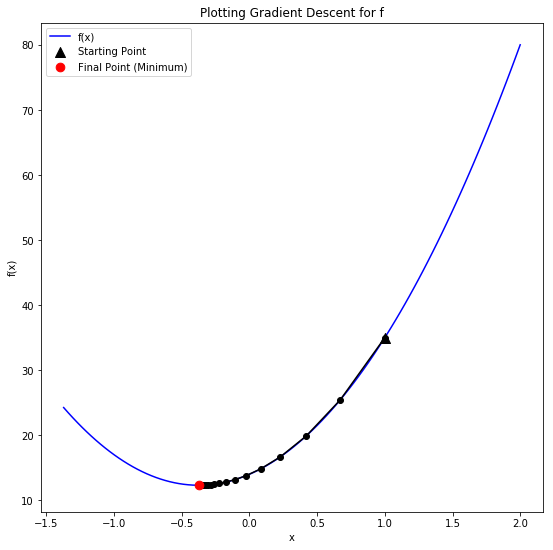

In [214]:
# Play with different values here to see how the algorithm reacts
starting_x = 1
alpha = .01
num_iterations = 100
epsilon = .001
gradient_descent_2D(starting_x, f, f_prime, alpha=alpha, num_iterations=num_iterations, epsilon=epsilon, plot=True)

array([0.00321119, 0.00321119])

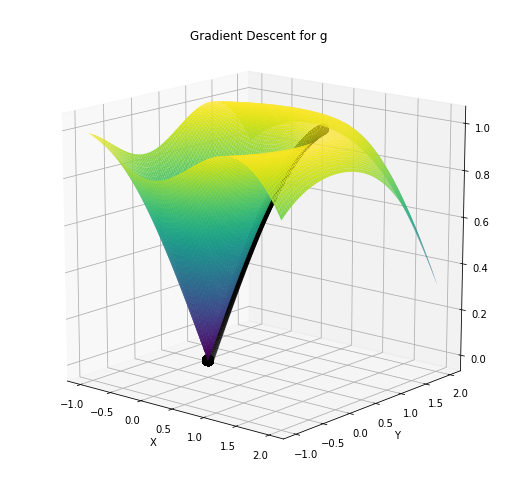

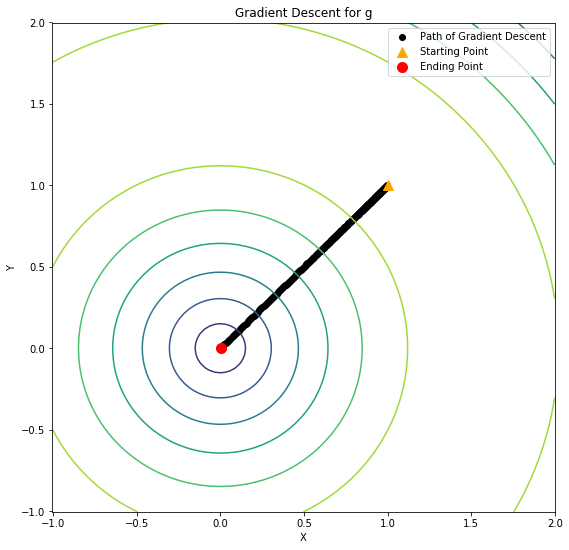

In [217]:
# Play with different values here to see how the algorithm reacts
starting_xy = np.array([1,1])
alpha = .01
num_iterations = 1000
epsilon = .001
gradient_descent_3D(starting_xy, g, gradient_g, alpha=alpha, num_iterations=num_iterations, epsilon=epsilon, plot=True)